In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.metrics import auc, precision_recall_curve, log_loss,confusion_matrix, recall_score, precision_score
from sklearn.compose import ColumnTransformer

In [2]:
df_iris = pd.read_csv(
    'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let´s analyse the dataset

In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# features
df_iris.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
df_iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# how many example we have of each species

df_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Model Creation

Before we start creating the model, we need check if the features are higly correlated. This problem can reduce the accuracy

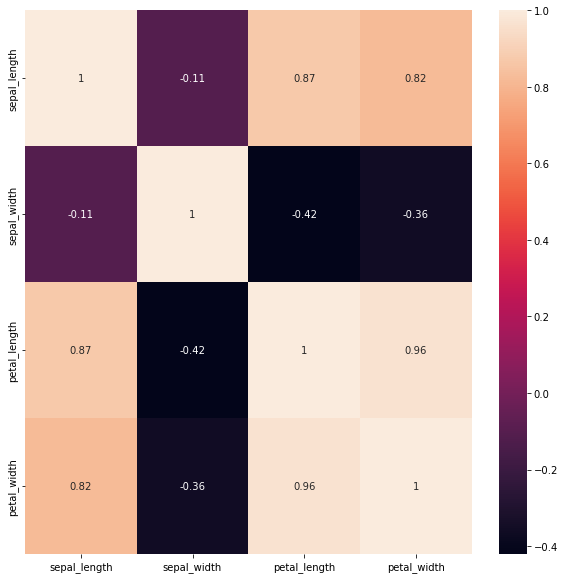

In [9]:
plt.figure(figsize = (10,10))

sns.heatmap(df_iris.corr(), annot=True)
plt.show()

Sepal_width is not correlating with any of the Features, whereas Petal_length and Petal_width is highly correlating with all of the features

In [10]:
df_train, df_test = train_test_split(df_iris,test_size=0.3,random_state=42)

In [11]:
X_train, y_train = df_train.drop('species', axis=1), df_train['species']
X_test, y_test = df_test.drop('species', axis=1), df_test['species']

In [12]:
cat_columns_churn = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns_churn = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [13]:
pipe_cat_columns_churn = ('one_hot_encoder' , 
                         OneHotEncoder(handle_unknown = 'ignore'),
                         cat_columns_churn)
pipe_num_columns_churn = ('scaler',
                         StandardScaler(),
                         num_columns_churn)

In [14]:
# creating the Pipeline

transformers = [pipe_num_columns_churn, pipe_cat_columns_churn]
pre_processor = ColumnTransformer(transformers)


In [16]:
model_reglog = Pipeline(steps=[('pre_processor' , pre_processor),
                               ('model' , LogisticRegression(max_iter=5000, random_state =123))])
model_svm = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', SVC(kernel='rbf', probability=True, random_state=123))])
model_knn = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', KNeighborsClassifier())])
model_dt = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', DecisionTreeClassifier(max_depth=5,random_state=123))])
model_rf = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', RandomForestClassifier(max_depth=5,random_state=123))])

In [17]:
classifiers = [model_reglog, model_svm, model_knn, model_dt, model_rf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print(type(classifier['model']).__name__,'\n')
    print(f'log_loss train: {log_loss(y_train, classifier.predict_proba(X_train))}')
    print(f'log_loss test: {log_loss(y_test, classifier.predict_proba(X_test))}')
    print(100*'-')


LogisticRegression 

log_loss train: 0.16023028064799139
log_loss test: 0.1171706815073894
----------------------------------------------------------------------------------------------------
SVC 

log_loss train: 0.11523030108008371
log_loss test: 0.07121605934182691
----------------------------------------------------------------------------------------------------
KNeighborsClassifier 

log_loss train: 0.11538942368538413
log_loss test: 0.06380751509296109
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier 

log_loss train: 0.018186119094137948
log_loss test: 4.440892098500627e-16
----------------------------------------------------------------------------------------------------
RandomForestClassifier 

log_loss train: 0.046211007386047234
log_loss test: 0.025898361714231752
----------------------------------------------------------------------------------------------------


we gonna choose the Random Forest Classifier, because this model have the lower Log Loss in the train dataset and test dataset